In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("seattle-weather.csv")

In [3]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [4]:
df.shape

(1461, 6)

In [5]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [6]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [8]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [9]:
df.duplicated().sum()

0

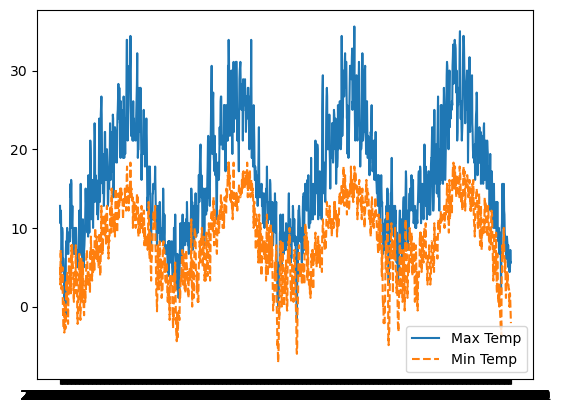

In [11]:
plt.plot(df['date'],df['temp_max'], label='Max Temp')
plt.plot(df['date'],df['temp_min'], label ="Min Temp", linestyle = '--')
plt.legend()

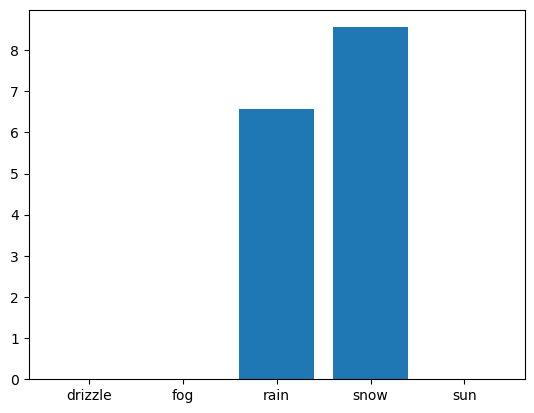

In [12]:
avg_precipitation = df.groupby('weather')['precipitation'].mean().reset_index()
plt.bar(avg_precipitation['weather'],avg_precipitation['precipitation'])
plt.show()

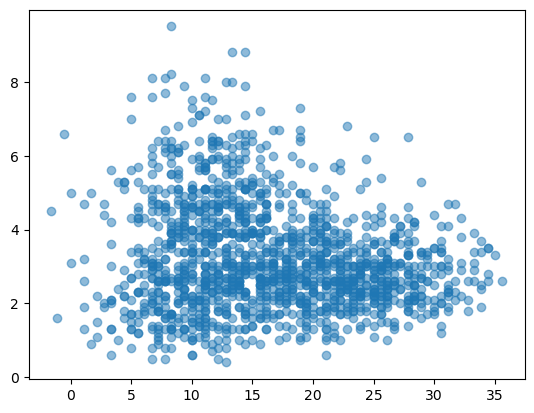

In [13]:
plt.scatter(df['temp_max'], df['wind'], alpha = 0.5)

(array([1.045e+03, 9.800e+01, 7.000e+01, 4.900e+01, 3.600e+01, 3.100e+01,
        2.200e+01, 2.000e+01, 1.500e+01, 1.500e+01, 1.100e+01, 1.000e+01,
        5.000e+00, 1.000e+00, 1.100e+01, 2.000e+00, 2.000e+00, 7.000e+00,
        2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00]),
 array([ 0.        ,  1.86333333,  3.72666667,  5.59      ,  7.45333333,
         9.31666667, 11.18      , 13.04333333, 14.90666667, 16.77      ,
        18.63333333, 20.49666667, 22.36      , 24.22333333, 26.08666667,
        27.95      , 29.81333333, 31.67666667, 33.54      , 35.40333333,
        37.26666667, 39.13      , 40.99333333, 42.85666667, 44.72      ,
        46.58333333, 48.44666667, 50.31      , 52.17333333, 54.03666667,
        55.9       ]),
 <BarContainer object of 30 artists>)

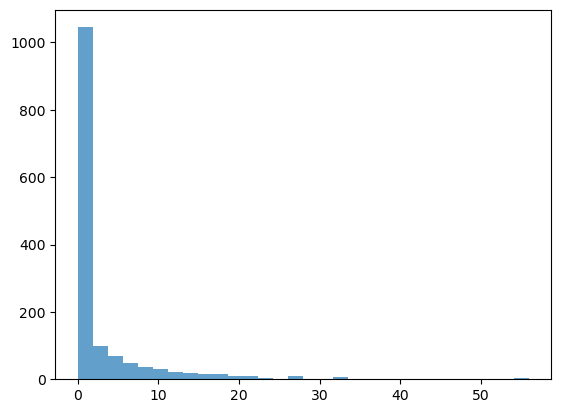

In [15]:
plt.hist(df['precipitation'], bins = 30, alpha = 0.7)

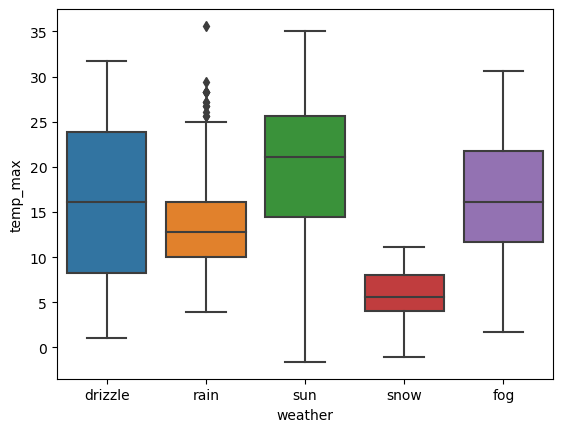

In [16]:
sns.boxplot(x = 'weather', y = 'temp_max', data = df)
plt.show()

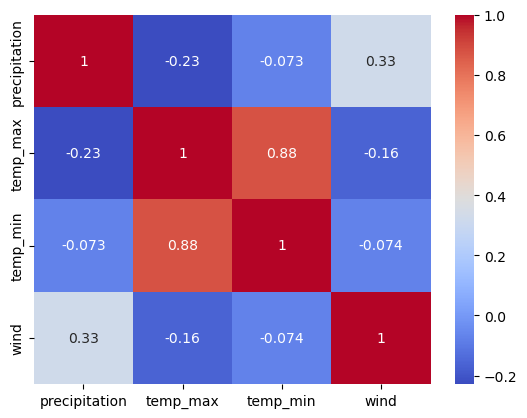

In [18]:
corr = df[['precipitation', 'temp_max', 'temp_min', 'wind']].corr()
sns.heatmap(corr, annot=True, cmap= 'coolwarm')
plt.show()

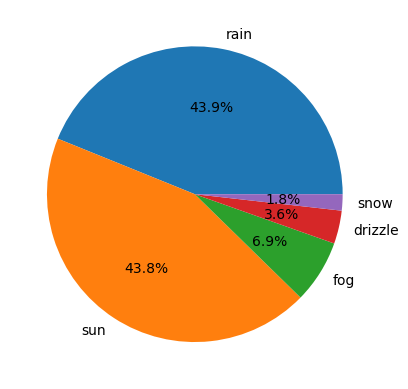

In [19]:
weather_counts = df['weather'].value_counts()
plt.pie(weather_counts, labels = weather_counts.index, autopct='%1.1f%%')
plt.show()

In [20]:
df.drop(['date'], axis=1, inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['weather'] = le.fit_transform(df['weather'])

In [22]:
x = df.drop(['weather'], axis=1)
y = df['weather']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [25]:
y_pred = model.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

In [27]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.8293515358361775


In [28]:
print("Confusion Matrix")
print(conf_matrix)
print("Classication Reports")
print(classification_rep)

Confusion Matrix
[[  0   0   0   0   9]
 [  1   0   0   0  24]
 [  0   0 109   3   8]
 [  0   0   4   4   0]
 [  1   0   0   0 130]]
Classication Reports
              precision    recall  f1-score   support

           0       0.00      0.00      1.00         9
           1       1.00      0.00      0.00        25
           2       0.96      0.91      0.94       120
           3       0.57      0.50      0.53         8
           4       0.76      0.99      0.86       131

    accuracy                           0.83       293
   macro avg       0.66      0.48      0.67       293
weighted avg       0.84      0.83      0.81       293

